# Spike Challenger

### Nombre: Elena González Marilaf

Las preguntas claves que en Chile debemos responder son:
<div><ul><li>
¿Ha aumentado la frecuencia de olas de calor en Chile? Para esto se deben analizar las estaciones de temperatura.</li>
<li>¿Existe una relación entre olas de calor y eventos extremos de caudal?
De existir una relación entre olas de calor y eventos extremos de caudal, 
<li>¿se puede explicar este evento extremo por las características de la cuenca en donde ocurre el peakflow?</li></ul>
    


In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
 

In [6]:
train = pd.read_csv('caudal_extra.csv')

In [7]:
len(train)

1411180

Desarrollo pregunta: ¿Ha aumentado la frecuencia de olas de calor en Chile? Para esto se deben analizar las estaciones de temperatura.

In [8]:
#Temperatura: dataframe solo las columnas qe necesito
temperatura = pd.DataFrame({
    'gauge_id' : train['gauge_id'],
    'fecha' : train['fecha'],
    'precip_promedio' : train['precip_promedio'],
    'temp_max_promedio' : train['temp_max_promedio'] })

temperatura.head()

,gauge_id,fecha,precip_promedio,temp_max_promedio
0,4540001,1960-01-06 00:00:00+00:00,0.0,NaN
1,4540001,1960-03-27 00:00:00+00:00,0.0,NaN
2,4540001,1960-05-07 00:00:00+00:00,0.0,NaN
3,4540001,1960-06-30 00:00:00+00:00,0.0,NaN
4,4540001,1960-07-22 00:00:00+00:00,0.0,NaN


In [9]:
#a.-reviso si la columna me sirve para el estudio. analizo los Nan para determinar si elimino filas
temperatura.isnull().sum()

gauge_id                  0
fecha                     0
precip_promedio       27767
temp_max_promedio    151563
dtype: int64

In [10]:
#contar total de datos para saber la representacion que signifca los datos nulos
null_prep = temperatura['precip_promedio'].isnull().sum()/len(temperatura)*100
null_temp = temperatura['temp_max_promedio'].isnull().sum()/len(temperatura)*100

print(null_prep)
print(null_temp)

1.9676440992644453
10.740160716563443


In [11]:
#decido quitar los nulos  
#temperatura.fillna(method = 'bfill', axis=0).fillna(0)
#temperatura.dropna(axis='columns')
temperatura.dropna(inplace=True)


In [12]:
##estadisticas
#len(temperatura)
print(temperatura['temp_max_promedio'].min())
print(temperatura['temp_max_promedio'].max())
print(temperatura['temp_max_promedio'].mean())
print(temperatura['temp_max_promedio'].std())
print(temperatura['temp_max_promedio'].count())

-19.0499992370605
41.5
19.21805861089836
7.3053587586091195
1256478


In [13]:
# son muchos datos por lo que voy a agrupar por mes y la temperatura quedaria promedio
#necesito ver la tendencia
#temperatura['mesAnno'] = pd.DatetimeIndex(temperatura.fecha).to_period("M")
#temperatura.groupby(['gauge_id', 'mesAnno']).temp_max_promedio.mean()

temperatura['fecha'] = pd.to_datetime(temperatura['fecha'])
temperatura['year'] = temperatura['fecha'].apply(lambda x: x.year)
temperatura['mes'] = temperatura['fecha'].apply(lambda x: x.month)


In [14]:
temperatura.groupby(['gauge_id', 'year','mes'],as_index=False).temp_max_promedio.mean()

,gauge_id,year,mes,temp_max_promedio
0,1020003,1985,1,13.666667
1,1020003,1985,2,12.333333
2,1020003,1985,3,13.846154
3,1020003,1985,4,12.840000
4,1020003,1985,5,12.111111
5,1020003,1985,6,9.529412
6,1020003,1985,8,11.259259
7,1020003,1985,9,11.782609
8,1020003,1985,10,14.384615
9,1020003,1986,1,12.867742


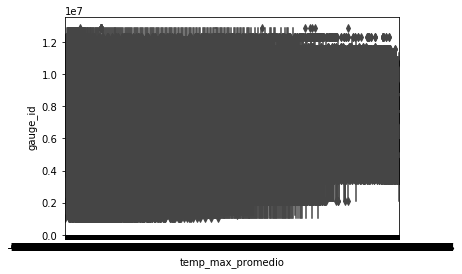

In [120]:
#grafico para saber tendencia
sb.distplot(temperatura['temp_max_promedio'])
sb.boxplot(x = 'temp_max_promedio', y = 'gauge_id', data = temperatura)

In [15]:
#quite una columna y ordene a mi conveniencia para verlo en fucnion del tiempo
temp_Clasificador = pd.DataFrame({
    'Anno' : temperatura['year'], 
    'Mes' : temperatura['mes'], 
    'GaugeId' : temperatura['gauge_id'],    
    'Temp_max_promedio' : temperatura['temp_max_promedio'] })

In [16]:
temp_Clasificador.head()

,Anno,Mes,GaugeId,Temp_max_promedio
32,1965,8,4540001,21.5
33,1965,9,4540001,20.5
34,1965,10,4540001,22.0
35,1965,10,4540001,20.5
36,1965,12,4540001,28.5


In [21]:
## entrenamiento , separo el set de prueba
X = temp_Clasificador[temp_Clasificador.columns.values[1:3]]
y = temp_Clasificador[temp_Clasificador.columns.values[0]]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [23]:
#estandarizacion
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

C:\Users\elena\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\elena\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\Users\elena\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """


In [28]:
##regresion logistica
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C = 100.0, random_state = 1)
lr.fit(X_train_std, y_train)

C:\Users\elena\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\elena\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=1, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [53]:
from mlxtend.plotting import plot_decision_regions
import itertools

#for clf, lab, grd in zip([X_test_std, y_test],labels,itertools.product([0, 1], repeat=2)):

for clf, lab, grd in zip([X_test_std, y_test],
                     labels,
                     itertools.product([0, 1],
                     repeat=2)):
    clf.fit(X_test_std, y_test)
    plot_decision_regions(X_test_std, y_test,clf=clf, legend=2)
    plt.xlabel('year')
    plt.ylabel('temp_max_promedio')
    plt.legend(loc = 'Temperaturas');

AttributeError: 'numpy.ndarray' object has no attribute 'fit'

In [60]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
 
gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))

labels = ['Logistic Regression',
          'Random Forest',
          'RBF kernel SVM',
          'Ensemble']

for clf, lab, grd in zip([X_test_std, y_test],
                         labels,
                         itertools.product([0, 1],
                         repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y,
                                clf=clf, legend=2)
    plt.title(lab)

plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'fit'

<Figure size 720x576 with 0 Axes>

1. HWN – the total number of events; 
2. HWD – the length of the longest event; 
3. HWF – the total number of days satisfying index criteria; and 
4. HWA – the hottest day (amplitude) of the hottest event. 